<a href="https://colab.research.google.com/github/stevenryanrobot/Reinforcement-Learning/blob/main/RL_Demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# inverted pendulum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 6.4 MB/s eta 0:00:00


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


>>> 开始训练...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


>>> 训练完成！
>>> 正在生成回放动画...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_r

>>> 动画已生成 (replay.gif)，请看下方：


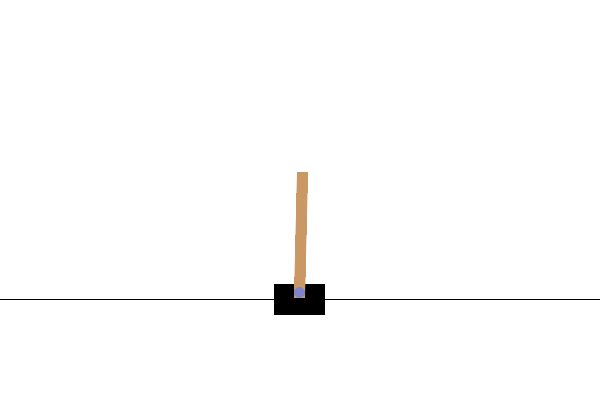

In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO
import imageio
from IPython.display import Image, display
import numpy as np

# 1. 训练阶段 (不需要渲染，速度最快)
print(">>> 开始训练...")
# 创建训练环境
env_train = gym.make("CartPole-v1")
model = PPO("MlpPolicy", env_train, verbose=0)
model.learn(total_timesteps=10000)
print(">>> 训练完成！")

# 2. 展示阶段 (关键修改点！)
# 这里的 render_mode 改为 "rgb_array"，意思是"把画面变成数据"，而不是"弹窗"
env_test = gym.make("CartPole-v1", render_mode="rgb_array")

observation, _ = env_test.reset()
frames = [] # 用来存每一帧画面

print(">>> 正在生成回放动画...")
for _ in range(500):
    # 记录当前画面
    frames.append(env_test.render())

    # 智能体预测动作
    action, _ = model.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = env_test.step(action)

    if terminated or truncated:
        observation, _ = env_test.reset()

env_test.close()

# 3. 把保存的画面合成 GIF 并显示
gif_path = "replay.gif"
imageio.mimsave(gif_path, frames, fps=30)

print(f">>> 动画已生成 ({gif_path})，请看下方：")
display(Image(filename=gif_path))

In [ ]:
!pip install gymnasium stable-baselines3 imageio